In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9447,0.0,0.0,1.0,0.0,3.0,My family tried singing in church one time but...,other,NaN,NaN,NaN,NaN
9448,0.0,0.0,1.0,0.0,3.0,"Award Shows are like circle jerks, except you ...",other,NaN,NaN,NaN,NaN
9449,0.0,0.0,1.0,0.0,3.0,Good morning to everyone except the jerks who ...,other,NaN,NaN,NaN,NaN
9450,0.0,0.0,0.0,1.0,0.0,Changing my name to Ed Zachary Wright,none,NaN,NaN,NaN,NaN


In [3]:
df.shape

(9452, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       9452 non-null   float64
 1   sexism       9452 non-null   float64
 2   other        9452 non-null   float64
 3   none         9452 non-null   float64
 4   label        9452 non-null   float64
 5   tweet        9452 non-null   object 
 6   category     9452 non-null   object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 812.4+ KB


In [5]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [6]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [7]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [8]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [9]:
df['category'].isnull().sum()

0

In [10]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [11]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9447,0.0,0.0,1.0,0.0,3.0,My family tried singing in church one time but...,other,NaN,NaN,NaN,NaN
9448,0.0,0.0,1.0,0.0,3.0,"Award Shows are like circle jerks, except you ...",other,NaN,NaN,NaN,NaN
9449,0.0,0.0,1.0,0.0,3.0,Good morning to everyone except the jerks who ...,other,NaN,NaN,NaN,NaN
9450,0.0,0.0,0.0,1.0,0.0,Changing my name to Ed Zachary Wright,none,NaN,NaN,NaN,NaN


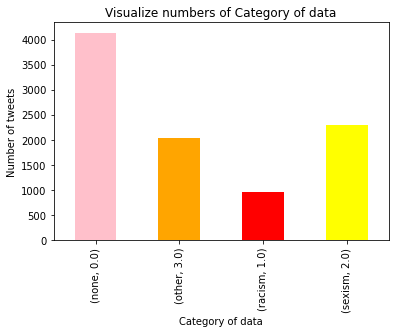

In [12]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visualize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

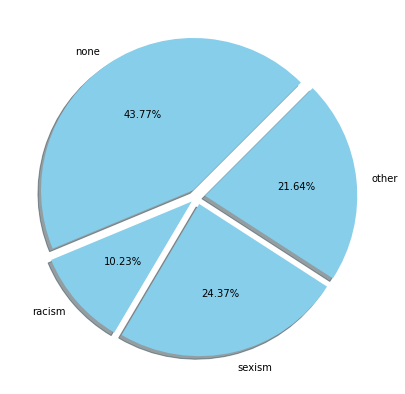

In [13]:
fig = plt.figure(figsize = (10,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.2f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [14]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 1600, height = 800).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


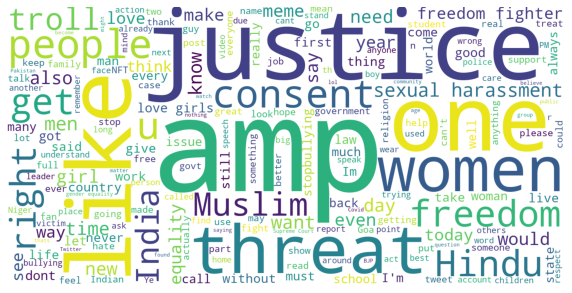

In [46]:
wordcloud_draw(none, 'none')

racism related tweets : 


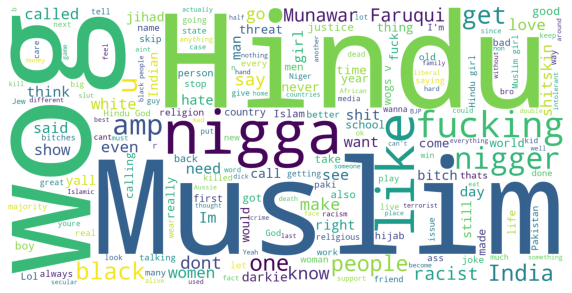

In [47]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


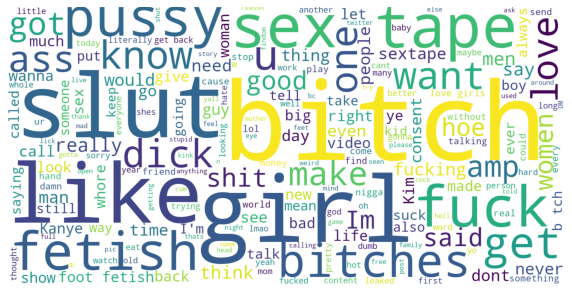

In [48]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


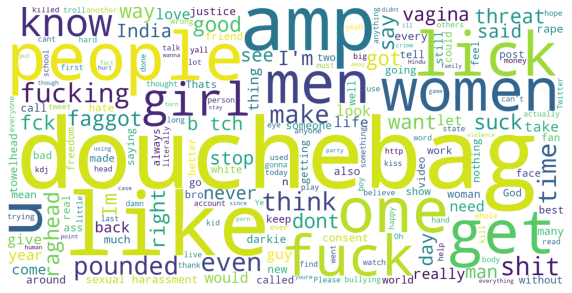

In [49]:
wordcloud_draw(other, 'other')

In [15]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

9452
9452


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features= 5000)
X = tfv.fit_transform(df.tweet).toarray()
y = np.array(df.category.values)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (9452, 5000)
y.shape =  (9452,)


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
print(len(x_train))
print(len(x_test))

7561
1891


In [19]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
y_train

array(['other', 'none', 'none', ..., 'none', 'sexism', 'sexism'],
      dtype=object)

In [22]:
y_test

array(['sexism', 'none', 'other', ..., 'none', 'other', 'none'],
      dtype=object)

In [23]:
#create list of model and accuracy dicts
perform_list = [ ]

In [24]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
        
    


    elif model_name == 'Support Vector Classifer':

        mdl = SVC()




    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    elif model_name == "Logistic Regression":
        mdl = LogisticRegression(max_iter=1000)
    
    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} %')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [25]:
begin = time.time()
run_model('Logistic Regression', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Logistic Regression: 78.79 %
Precision : 0.7879428873611846
Recall : 0.7879428873611846
F1-score : 0.7879428873611846
Time taken:  10.55701231956482


In [26]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 73.14 %
Precision : 0.7313590692755156
Recall : 0.7313590692755156
F1-score : 0.7313590692755156
Time taken:  0.7861442565917969


In [ ]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

In [182]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

KeyboardInterrupt: 

In [31]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 71.84 %
Precision : 0.7183794466403162
Recall : 0.7183794466403162
F1-score : 0.7183794466403162
Time taken:  192.636403799057


In [27]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Random Forest: 81.02 %
Precision : 0.810153358011634
Recall : 0.810153358011634
F1-score : 0.810153358011634
Time taken:  174.31835269927979


In [28]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,78.79,0.79,0.79,0.79
1,Multinomial Naive Bayes,73.14,0.73,0.73,0.73
2,Random Forest,81.02,0.81,0.81,0.81


In [29]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 81.02 %


In [30]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [31]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(tfv, vectorizer_filename, compress = 3) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename, compress = 3) # save model
loaded_model = joblib.load(model_filename) # load model


In [32]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:

    c = twint.Config()
    
#     c.Username = input("Enter the username : ")

    c.Search = input("Enter the topic you want to search : ")

    c.Lang = "en"


#     c.Near = "India"
    
    c.Limit = 100

    c.Min_Likes = 100

    c.Store_csv = True       # store tweets in a csv file


    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file

    twint.run.Search(c)

except Exception as e:
    print(e)
  

Enter the topic you want to search : nigga
1496121755332931586 2022-02-22 19:26:37 +0530 <LondonIsAKeeper> If you want a bad bitch then go get one..oh I forgot you niggas is bums that's why you can't get one.
1496121752426094596 2022-02-22 19:26:37 +0530 <destinymakiyah> It’s a real one Birthdayyyy! My nigga 4 lyfe @ReezyBabyyy 🥳♓️🎀
1496121751985856514 2022-02-22 19:26:36 +0530 <BeeBee2yu> Aye I love to see it ! And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me 🥵😂😂😂😂
1496121750987460610 2022-02-22 19:26:36 +0530 <royslimeto> ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA🤣😘🩸💚
1496121746205941765 2022-02-22 19:26:35 +0530 <KoolAidBoomin> Nîggas really saying Tony Parker better than T-Mac? Lmao
1496121739914457089 2022-02-22 19:26:34 +0530 <Simply_GorJASZ> Niggas be selling pipe dreams
1496121734914842625 2022-02-22 19:26:32 +0530 <ROBBSTARKWASDUM> @Tity2Jans How about when dude in orange starts to come to he says “you ok my nigga?” and knock

In [55]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


100


0     If you want a bad bitch then go get one..oh I ...
1     It’s a real one Birthdayyyy! My nigga 4 lyfe @...
2     Aye I love to see it ! And when he dubbed back...
3     ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY N...
4     Nîggas really saying Tony Parker better than T...
                            ...                        
95    jacobymccray makin fun of niggas looks now?aig...
96     Got it out the mud like a nigga playing baseball
97    Yeat and Randy Orton the only sanctioned white...
98    Allat woofin on the net nigga, i thought you w...
99                                 @God_Son80 Bye nigga
Name: tweet, Length: 100, dtype: object

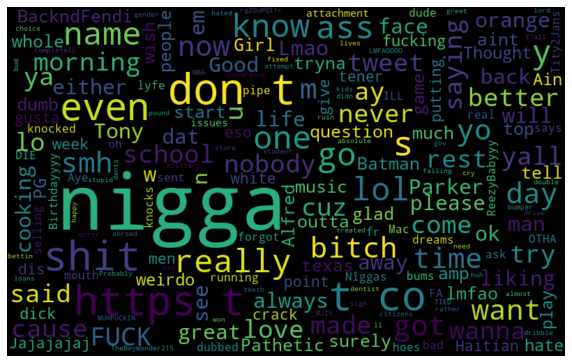

In [34]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [57]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en' and (len(p.clean(input_txt)) > 3):
            return p.clean(input_txt)

    except Exception as e:
        print(e)

In [58]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

In [59]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0    If you want a bad bitch then go get one..oh I ...
1            Its a real one Birthdayyyy! My nigga lyfe
2    Aye I love to see it ! And when he dubbed back...
3    ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY N...
4    Nggas really saying Tony Parker better than T-...
Name: tweet, dtype: object

Length before deleting:  100
Length after deleting:  81
Empty values:  0


In [60]:
df1['tweet'].head()

0    If you want a bad bitch then go get one..oh I ...
1            Its a real one Birthdayyyy! My nigga lyfe
2    Aye I love to see it ! And when he dubbed back...
3    ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY N...
4    Nggas really saying Tony Parker better than T-...
Name: tweet, dtype: object

In [61]:
y_pred1 = tfv.transform(df1['tweet'][:10].values)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   





[1]  If you want a bad bitch then go get one..oh I forgot you niggas is bums that's why you can't get one.  [sexism]

[2]  Its a real one Birthdayyyy! My nigga lyfe  [racism]

[3]  Aye I love to see it ! And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me  [racism]

[4]  ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA  [racism]

[5]  Nggas really saying Tony Parker better than T-Mac? Lmao  [none]

[6]  How about when dude in orange starts to come to he says you ok my nigga? and knocks him out again  [racism]

[7]  It dont even be the hoes running they mouth it be the niggas .  [racism]

[8]  i dont even be liking these niggas fr I just have attachment issues  [racism]

[9]  MUHFUCKIN TIED  [none]

[10]  niggas will tweet about /22/22 but wont go the store for their kids who need go the dentist get they teeth fixed  [racism]


In [69]:
lemmatizer = WordNetLemmatizer()

In [63]:
tweets = []
for i in df1['tweet']:
    tweets.append(i)
tweets

["If you want a bad bitch then go get one..oh I forgot you niggas is bums that's why you can't get one.",
 'Its a real one Birthdayyyy! My nigga lyfe',
 'Aye I love to see it ! And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me',
 'ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA',
 'Nggas really saying Tony Parker better than T-Mac? Lmao',
 'How about when dude in orange starts to come to he says you ok my nigga? and knocks him out again',
 'It dont even be the hoes running they mouth it be the niggas .',
 'i dont even be liking these niggas fr I just have attachment issues',
 'MUHFUCKIN TIED',
 'niggas will tweet about /22/22 but wont go the store for their kids who need go the dentist get they teeth fixed',
 'military niggas be like would you rather have student loans orrrr sign your life away to the U.S govt and be treated like absolute shit while you ruin the lives of citizens abroadyour choice bud LMFAOOOO',
 'this almost made a nigga c

In [86]:
corpus = []
for i in range(len(tweets)):
    tweet = re.sub('[^a-zA-Z]', ' ', tweets[i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    corpus.append(tweet)

for i in corpus:
    print(i)

want bad bitch go get one oh forgot nigga bum get one
real one birthdayyyy nigga lyfe
aye love see dubbed back ask nigga ok knocked em really sent
fuck otha nigga ill die fa nigga
nggas really saying tony parker better mac lmao
dude orange start come say ok nigga knock
dont even hoe running mouth nigga
dont even liking nigga fr attachment issue
muhfuckin tied
nigga tweet wont go store kid need go dentist get teeth fixed
military nigga like would rather student loan orrrr sign life away u govt treated like absolute shit ruin life citizen abroadyour choice bud lmfaoooo
almost made nigga cry
gender great day great day nigga fuck
cooking cooking huh
always nigga dent bumper falling want drive stupid shit probably insurance either
im bettin ill completely double hated nigga please dont greet pound
shit sad nigga didnt even attempt dribble good lord smh
yall see happy n pregnant w nigga know ive reached pinnacle peak happiness
nigga w drama man lol
lol way nigga asking question nowadays sure

In [87]:
y_pred1 = tfv.transform(corpus)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   




[1]  If you want a bad bitch then go get one..oh I forgot you niggas is bums that's why you can't get one.  [sexism]

[2]  Its a real one Birthdayyyy! My nigga lyfe  [racism]

[3]  Aye I love to see it ! And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me  [racism]

[4]  ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA  [sexism]

[5]  Nggas really saying Tony Parker better than T-Mac? Lmao  [none]

[6]  How about when dude in orange starts to come to he says you ok my nigga? and knocks him out again  [racism]

[7]  It dont even be the hoes running they mouth it be the niggas .  [racism]

[8]  i dont even be liking these niggas fr I just have attachment issues  [racism]

[9]  MUHFUCKIN TIED  [none]

[10]  niggas will tweet about /22/22 but wont go the store for their kids who need go the dentist get they teeth fixed  [racism]

[11]  military niggas be like would you rather have student loans orrrr sign your life away to the U.S govt and be tre